# Simulation of a positron-induced Muon Source

Ardino Rocco, Manzali Francesco, Paccagnella Andrea, Valente Alessandro

# Index <a class="anchor" id="Report.index"></a>

1. [Description and Relevant formulas](#Report.1)
2. [Monte Carlo with monochromatic beam](#Report.2)
3. [Beryllium target statistics](#Report.3)
4. [Monte Carlo with non-monochromatic beam](#Report.4)
5. [Tracking detector statistics](#Report.5)
6. [Comparison with Babayaga simulator results](#Report.6)

# 1. Description and Relevant formulas <a class="anchor" id="#Report.1"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>

The main goal of this project is to produce a Monte Carlo simulation for the scattering $e^+ + e^- \to \mu^+ + \mu^-$, with $\sqrt{s} \sim 2 m_\mu$ close to the muon production threshold. 

In the following, all quantities denoted with a star ($^*$) are measured in the center of mass (CM) frame of reference, while quantities without it refer to the laboratory frame. Also, $c=1$ for all computations.

The leading-order **differential cross-section** for the unpolarized scattering $e^+ + e^- \to \mu^+ + \mu^-$ in the CM frame has the following expression [[1]](#quotes.diffcross), as function of the total energy $\sqrt{s}$ in the CM frame, and the emission angles $\theta^*$ and $\Omega^*$:
$$\frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*}(\sqrt{s},\theta^*, \varphi^*) = \frac{\alpha^2}{4s} \left(1- \frac{4 m_\mu^2}{s}\right)^{1/2} \left(1- \frac{4 m_e^2}{s}\right)^{-1/2}\left( 1+ \frac{4}{s} (m_e^2 + m_\mu^2) + \left(1-\frac{4 m_e^2}{s}\right)\left(1-\frac{4 m_\mu^2}{s}\right)\cos^2\theta^*\right) \label{eqn:diff-cross}\tag{1.1}$$
Integration over the sphere leads to the **total cross section**:
$$\sigma^*(\sqrt{s}) = \int_0^\pi \sin\theta^* \mathrm{d}\theta^* \int_0^{2\pi} {\rm d}\varphi^* \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*}(\sqrt{s},\theta^*,\varphi^*) = \frac{4\pi \alpha^2}{3 s^3} \frac{\sqrt{1-\frac{4 m_\mu^2}{s}}}{\sqrt{1-\frac{4 m_e^2}{s}}} (2 m_e^2 + s)(2m_\mu^2 + s) \label{eqn:cross}\tag{1.2}$$

For a fixed energy $\sqrt{s}$, the angle distribution $f(\theta^*, \varphi^*)$ of the scattered particles is given by normalizing the differential cross-section:
$$f(\theta^*,\varphi^*) = \frac{1}{\sigma} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*} (\sqrt{s}, \theta^*, \varphi^*) \label{eqn:angular}\tag{1.3}$$

As the scattering process possesses cylindrical symmetry, the differential cross section does not depend on $\varphi^*$. This means that $f(\theta^*, \varphi^*)$ can be factored into two independent **angular distributions**, $g(\theta^*)$ for the $\theta^*$ angle, and a uniform $h(\varphi^*)$ for the $\varphi^*$ angle:
$$g(\theta^*) = \frac{\mathrm{d}\sigma^*}{\mathrm{d}\theta^*} = \int_0^{2\pi} \mathrm{d}\varphi^* \frac{1}{\sigma^*} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*} \sin\theta^* = \frac{2\pi \sin\theta^*}{\sigma^*} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*}; \qquad h(\varphi^*) = \int_0^\pi \sin(\theta^*)\mathrm{d}{\theta^*} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*} = \frac{1}{2\pi} \label{eqn:gh}\tag{1.4}$$

We consider the $e^-$ stationary in the laboratory frame, so that $\beta_{e^-} = 0$. This means that the velocity $\beta$ of the CM frame with respect to the laboratory is $\beta = \beta^*_{e^-}$. We can express it as a function of $\sqrt{s}$ as follows. First, note that the electron/positron $4$-momenta in the CM frame are:
$$ p_{e^\pm}^* = (\mathcal{E}_{e^\pm}^*, \pm \vec{p}_{e^+}^*); \qquad \mathcal{E}_{e^\pm}^* = \sqrt{m_e^2 + ||\vec{p}_e^*||^2}$$
where $\vec{p}_{e^+}^*$ is the positron $3$-momentum in the CM frame.


So $s$ is equal to:
$$ s = (p_{e^-}^* + p_{e^+}^*)^2 = 4(m_e^2 + ||\vec{p}_e^*||^2) = 4 (\mathcal{E}^*_e)^2 \Rightarrow \mathcal{E}_e^* = \frac{\sqrt{s}}{2} \label{eqn:Ee}\tag{1.5}$$
Then:
$$\beta^*_e = \beta = \frac{||\vec{p}_e^*||^2}{\mathcal{E}_e^*} = \frac{\sqrt{(\mathcal{E}_e^*)^2 - m_e^2}}{\mathcal{E}_e^*} = \sqrt{1- \frac{m^2_e}{(\mathcal{E}_e^*)^2}} = \sqrt{1-\frac{4 m_e^2}{s}} \label{eqn:betae}\tag{1.6}$$

The same calculations can be done for the $\mu^{\pm}$, leading to:
$$\beta_{\mu^\pm}^* = \sqrt{1-\frac{4 m_\mu^2}{s}} \label{eqn:betamu}\tag{1.7}$$
Then, the norm of the muon $3$-momentum as function of $\sqrt{s}$ is:
$$||\vec{p}_\mu^*|| = \sqrt{(\mathcal{E}_\mu^*)^2 - m_\mu^2} = \sqrt{\frac{s}{4} - m_\mu^2} \label{eqn:pmu}\tag{1.8} $$

Knowing $\sqrt{s}$, $\theta^*$ and $\varphi^*$ uniquely identifies the muon $4$-momentum components:

$$ p^*_\mu = \left( \frac{\sqrt{s}}{2}, \vec{p}_\mu^* \right) \qquad \vec{p}_\mu^* = ||\vec{p}_\mu^*|| (\cos \theta^*, \sin\theta^* \cos\varphi^*, \sin\theta^*\sin\varphi^*) \label{eqn:pmusphere}\tag{1.9} $$

Finally, we can boost the angle $\theta^*$ and the $4$-momentum to the laboratory frame:
$$\tan\theta_\mu = \frac{\sin\theta^*_\mu}{\gamma \left( \cos\theta^*_\mu + \frac{\beta}{\beta^*_\mu} \right)} \label{eqn:angleboost}\tag{1.10}$$

$$ \begin{pmatrix}\mathcal{E} \\ p_x \\ p_y \\ p_z \end{pmatrix} = \begin{pmatrix} \gamma & \beta \gamma & 0 & 0 \\
\beta \gamma & \gamma & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \end{pmatrix} \begin{pmatrix} \mathcal{E}^* \\ p_x^* \\ p_y^* \\ p_z^* \end{pmatrix} \label{eqn:p-boost}\tag{1.11} $$

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

#Constants
alpha = 0.00729735257
mmu = 105.66 #MeV
me = 0.511 #MeV

#Cross-section
def dsigma(s, theta):
    """Differential cross-section (1) [MeV^-2 sr^-1]"""
    return (alpha**2 / (4*s)) * (beta_mu(s) / beta_e(s)) * (1. + 4. * (me**2 + mmu**2) / s + beta_mu(s)**2 * beta_e(s)**2 * np.cos(theta)**2)

def sigma(s):
    """Total cross section (2) [MeV^-2]"""
    return (4 * np.pi * alpha**2) / (3 * s**3) * (beta_mu(s) / beta_e(s)) * (2 * me**2 + s) * (2 * mmu**2 + s)

#Distributions
def g(s, theta):
    """Distribution for theta* [First. eq. in (4)]"""
    
    return (2 * np.pi) * np.sin(theta) * (3 * s * (4 * (me**2 + mmu**2) + s) + 3 * (-4 * me**2 + s) * (-4*mmu**2 + s) * np.cos(theta)**2) / \
           (16 * np.pi * (2 * me**2 + s) * (2 * mmu**2 + s))

def g_cdf(s, theta):
    """CDF for the theta* distribution"""
    
    return (4 * (2 * me**2 + s) * (2 * mmu**2 + s) - 3 * s * (4 * me**2 + 4 * mmu**2 + s) * np.cos(theta) + (4 * me**2 - s) * (-4 * mmu**2 + s) * np.power(np.cos(theta),3)) / \
           (8 * (2 * me**2 + s) * (2 * mmu**2 + s))

#Kynematics functions
def beta_mu(s):
    """beta_mu* (eq. 7)"""
    return np.sqrt(1 - 4*(mmu**2)/s)

def beta_e(s):
    """beta_e* = beta (eq. 6)"""
    return np.sqrt(1 - 4*(me**2)/s)

def gamma_e(s):
    """gamma_e^* = gamma"""
    return 1 / np.sqrt(1 - beta_e(s)**2)

def p_mu_cm(s):
    """Norm of muon 3-momentum in CM (eq. 8)"""
    return np.sqrt(s/4 - mmu**2)

#Boosts
def theta_boost(s, theta_cm):
    """Converts theta* (measured in CM) for a muon into tan(theta) (measured in laboratory)"""
    
    return np.sin(theta_cm) / \
           (gamma_e(s) * (np.cos(theta_cm) + beta_e(s)/beta_mu(s)))

def energy_x_boost(s, x_cm):
    """Boosts E* => E, and x^* => x (from CM to lab frame), with the following formula:
        E = gamma * ( E_cm        + beta * x_cm )
        x = gamma * ( beta * E_cm + x_cm        )
        with beta = beta_e(s), and E_cm = sqrt(s)/2
    """
    
    E_cm  = np.sqrt(s) / 2
    gamma = gamma_e(s)
    beta  = beta_e(s)
    
    return (gamma * ( E_cm + beta * x_cm ), gamma * (beta * E_cm + x_cm))

#Utility
def to_cartesian(norm, theta, phi):
    """Returns cartesian components of 3-vector (eq. 9)"""
    sintheta = np.sin(theta)
    return (norm * np.cos(theta), norm * sintheta * np.cos(phi), norm * sintheta * np.sin(phi))

In [2]:
#Plot settings

from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], })
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)
rc('axes', titlesize=16, labelsize=14) 
rc('legend', fontsize=12)

# Distribution plots

## a. Cross-section

The plot of the cross section $\sigma(\sqrt{s})$ and of (a section of) the differential cross section $\rm{d}\sigma/\rm{d}\Omega (\theta^*, \varphi^*)$ are shown below.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


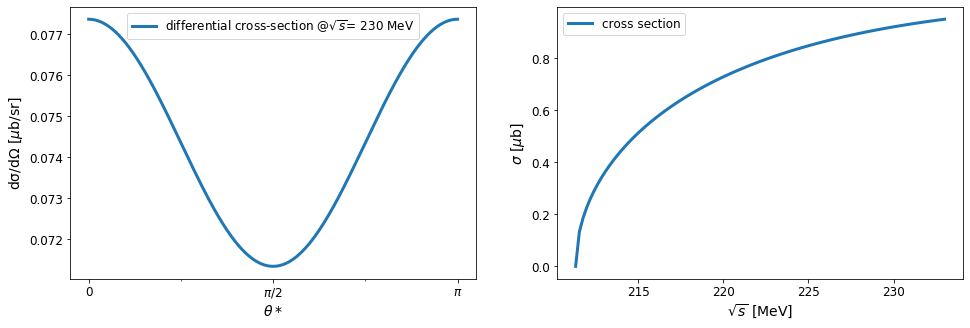

In [3]:
sqrs = 230 #fix center of mass energy to 230 MeV for all the distribution plots
s = sqrs**2


theta = np.linspace(0,np.pi,1000)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))

ax1.plot(theta, dsigma(s,theta) * 0.3894 * 1e9, lw=3, label='differential cross-section @$\sqrt{s}$= 230 MeV')
ax1.set_xlabel('$\\theta*$')
ax1.set_ylabel(r'$\rm{d}\sigma$/$\rm{d}\Omega$ [$\mu$b/sr]')
ax1.xaxis.set_major_locator(MultipleLocator(np.pi/2))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))

ax1.set_xticks([0,np.pi/2,np.pi])
ax1.set_xticklabels(['0','$\\pi/2$','$\\pi$'])

ax1.legend()


xspace = np.linspace(2*mmu, 233, 100)
ax2.plot(xspace, sigma(xspace**2) * 0.3894 * 1e9, lw=3, label='cross section')
ax2.set_xlabel(r'$\sqrt{s}$ [MeV]')
ax2.set_ylabel(r'$\sigma$ [$\mu$b]')

ax2.legend()

plt.show()

We choose a value of $\sqrt(s) = $ 230 MeV for all the following distribution plots, as it is close to the maximum of $\sigma(s)$, while still being near the threshold. To plot the distributions for $\theta^*$ and the $3$-momentum components $\vec{p}^*$ we need a way to sample the angular distribution $g(\theta^*)$. This is done by using the inverse-transform method, where we invert the CDF of $g(\theta^*)$. All the details are reported in the [following section 2](#Report.2).

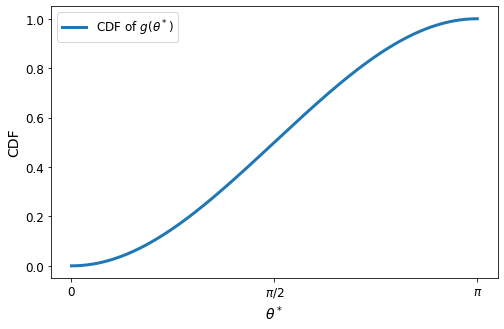

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

ax.plot(theta, g_cdf(s,theta), label=r'CDF of $g(\theta^*)$', lw=3)
ax.set_xticks([0,np.pi/2,np.pi])
ax.set_xticklabels(['0','$\\pi/2$','$\\pi$'])

ax.set_xlabel(r'$\theta^*$')
ax.set_ylabel(r'CDF')
ax.legend()

plt.show()

## b. Angle $\theta^*$ of emission (CM)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


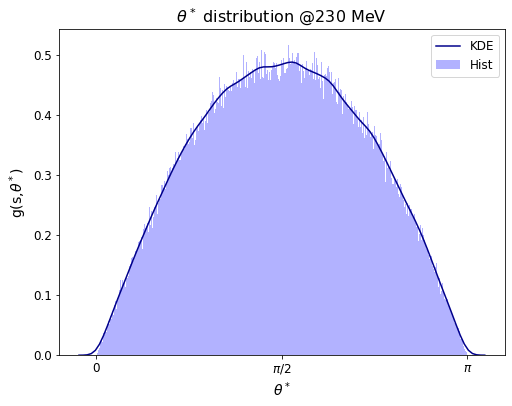

In [5]:
#Compute inverse CDF of g(theta*) by interpolation
inv_cdf = interp1d(g_cdf(230**2, theta), theta, fill_value="extrapolate") #need to extrapolate for extrema values (z = 0,1)


#Sample some angles
num_samples = 500000
unif_samples = np.random.uniform(size=num_samples)
thetas = inv_cdf(unif_samples)
phis   = np.random.uniform(0, 2 * np.pi, size=num_samples)

#Theta
fig, (ax) = plt.subplots(1, 1, figsize=(8,6))
ax = sns.distplot(thetas, kde_kws  = {'label': 'KDE',  'color': 'darkblue'},
                          hist_kws = {'label': 'Hist', 'color': 'blue', 'alpha': 0.3,
                                      'linewidth': 1,  'histtype':'barstacked'},
                          bins = int(np.sqrt(len(thetas))),)
ax.set_xlabel('$\\theta^*$')
ax.set_ylabel('g(s,$\\theta^*$)')
ax.set_title(r'$\theta^*$ distribution @230 MeV')
plt.xticks([0,np.pi/2,np.pi],['0','$\\pi/2$','$\\pi$'] )
plt.legend()
plt.show()

## c. Momenta (CM)

For every event, two muons are generated, with opposite angles $\theta^*_1 = -\theta^*_2$ and $\varphi^*_1 = - \varphi^*_2$. By symmetry, the distribution of their $3$-momentum components are the same. Also, as the process is cylindrically symmetric, the distributions for $p_y^*$ and $p_z^*$ are the same.

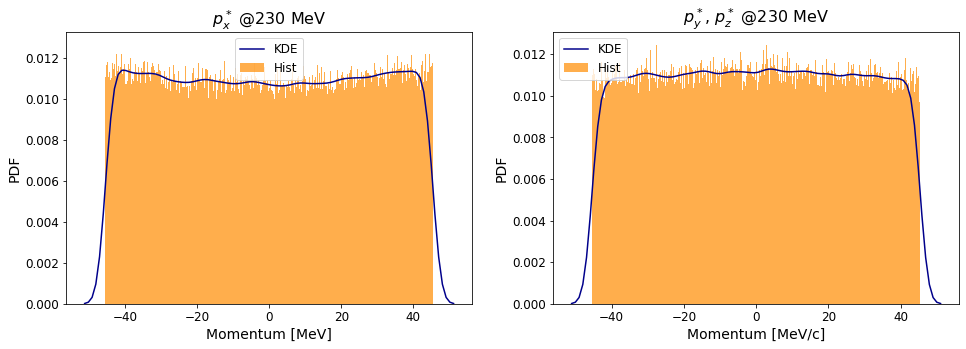

In [6]:
#Momentum CM
fig, (a_px, a_py) = plt.subplots(1, 2, figsize=(16, 5))

p_norm = p_mu_cm(s)

a_px.set_title("$p_x^*$ @230 MeV")
a_px.set_xlabel("Momentum [MeV]")
a_px.set_ylabel("PDF")
px_cm = p_norm * np.cos(thetas)
sns.distplot(px_cm, ax = a_px, bins = int(np.sqrt(num_samples)), 
                    kde_kws  = {'color': 'darkblue',   'label': 'KDE'},
                    hist_kws = {'color': 'darkorange', 'alpha': 0.7, 'linewidth': 1, 'histtype':'barstacked', 'label': 'Hist'})

a_py.set_title("$p_y^*$, $p_z^*$ @230 MeV")
a_py.set_xlabel("Momentum [MeV/c]")
a_py.set_ylabel("PDF")
sns.distplot(p_norm * np.sin(thetas) * np.cos(phis), ax = a_py, bins = int(np.sqrt(num_samples)),
             kde_kws  = {'color': 'darkblue',  'label': 'KDE'}, 
             hist_kws = {'color': 'darkorange', 'alpha': 0.7, 'linewidth': 1,'histtype': 'barstacked', 'label': 'Hist'})


## d. Angle $\theta$ (laboratory)

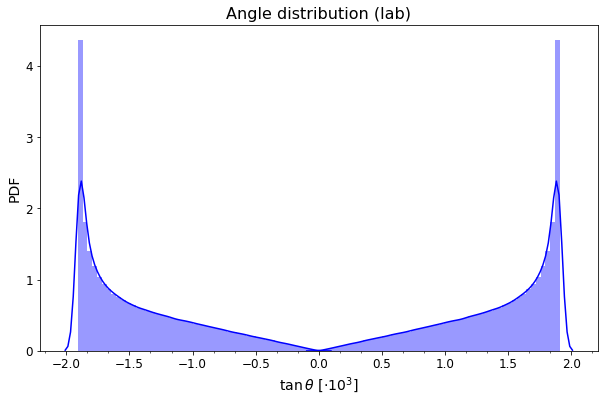

In [7]:
#Angle (laboratory)
ths_cm_boosted  = theta_boost(s, thetas) #boost the two particles
ths_cm_boosted2 = theta_boost(s, -thetas)

plt.subplots(figsize=(10,6))
ax = sns.distplot(ths_cm_boosted  * 1e3, color = 'blue')
ax = sns.distplot(ths_cm_boosted2 * 1e3, color = 'blue')

ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.set_title("Angle distribution (lab)")
ax.set_xlabel(r"$\tan\>\theta$ [$\cdot 10^3$]")
ax.set_ylabel(r"PDF")

plt.show()

## e. Energy and momentum (laboratory)

The momentum distributions $p_y$ and $p_z$ are the same as the ones for $p_y^*$ and $p_z^*$, as they are orthogonal to the boost axis. So, the only interesting distributions are that of energy and $p_x$. As the momentum along $x$ is in the order of GeVs, $\mathcal{E} \approx p_x$ and the two distributions are very similar.

In [8]:
#Momentum boost
E_cm = sqrs / 2
E_mu_lab  = gamma_e(s) * (E_cm  - px_cm * beta_e(s))
px_mu_lab = gamma_e(s) * (px_cm + E_cm  * beta_e(s))

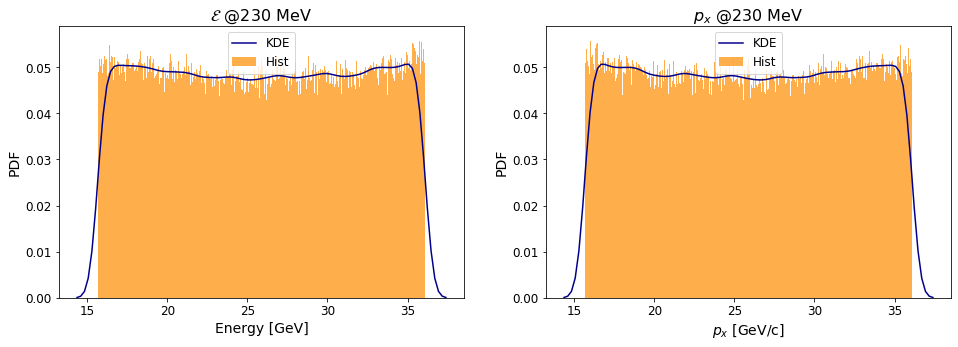

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

sns.distplot(E_mu_lab / 1000,  ax = ax1, bins = int(np.sqrt(num_samples)), 
                    kde_kws  = {'color': 'darkblue',   'label': 'KDE'},
                    hist_kws = {'color': 'darkorange', 'alpha': 0.7, 'linewidth': 1, 'histtype':'barstacked', 'label': 'Hist'})
ax1.set_title(r'$\mathcal{E}$ @230 MeV')
ax1.set_xlabel(r'Energy [GeV]')
ax1.set_ylabel(r'PDF')

sns.distplot(px_mu_lab / 1000, ax = ax2, bins = int(np.sqrt(num_samples)), 
                    kde_kws  = {'color': 'darkblue',   'label': 'KDE'},
                    hist_kws = {'color': 'darkorange', 'alpha': 0.7, 'linewidth': 1, 'histtype':'barstacked', 'label': 'Hist'})

ax2.set_title(r'$p_x$ @230 MeV')
ax2.set_xlabel(r'$p_x$ [GeV/c]')
ax2.set_ylabel(r'PDF')

plt.show()

# 2. Monte Carlo with monochromatic beam <a class="anchor" id="Report.2"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>


The first step in the simulation of the process is a Monte Carlo simulation in the condition of a monochromatic beam, namely a beam with the following characteristics:
* its transversal section is point-like;
* the energy of its particles is the same.

For this purpose the inverse transform method was chosen, since the CDF of the distribution $g(\theta^*)$ is analytic and so it is easy to implement, with better performances. Concerning the distribution $h(\varphi^*)$, it is uniform in $[0,2\pi]$, so it is easy to sample and we will focus on sampling $g(\theta^*)$. Hence, known:

$$
g(\theta^*) = 
\frac{\mathrm{d}\sigma^*}{\mathrm{d}\theta^*} = 
\int_0^{2\pi} \mathrm{d}\varphi^* \frac{1}{\sigma^*} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*} \sin\theta^* = 
\frac{2\pi \sin\theta^*}{\sigma^*} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*},
$$

$\text{CDF}[g(\theta^*)]$ can be computed through:

$$
\begin{align}
    \text{CDF}[g(\theta^*)]
    =& 
    \int_{0}^{\theta^*} g(\theta^*) \mathrm{d} \theta^* \\
    %=& 
    %\int_{0}^{\theta^*}\frac{2\pi \sin\theta^*}{\sigma} \frac{\alpha^2}{4s} \left(1- \frac{4 m_\mu^2}{s}\right)^{1/2} \left(1- \frac{4 m_e^2}{s}\right)^{-1/2}\left[ 1+ \frac{4}{s} (m_e^2 + m_\mu^2) + \left(1-\frac{4 m_e^2}{s}\right)\left(1-\frac{4 m_\mu^2}{s}\right)\cos^2\theta^*\right] \\
    =& 
    \frac{2\pi}{\sigma} \frac{\alpha^2}{4s} \left(1- \frac{4 m_\mu^2}{s}\right)^{1/2} \left(1- \frac{4 m_e^2}{s}\right)^{-1/2} \times \\
    & \times \left\{ \left[1+ \frac{4}{s} (m_e^2 + m_\mu^2)\right] (1 - \cos\theta^*) + \frac{1}{3}\left(1-\frac{4 m_e^2}{s}\right)\left(1-\frac{4 m_\mu^2}{s}\right)(1 - \cos^3\theta^*)\right\} \tag{1.12}
\end{align}
$$

The inverse of the CDF is computed by interpolation through `scipy` function `interp1d`. Finally, the event generation rule is the following:

$$
\begin{align}
    r_i \ &\text{random uniform in} \ [0,1]    &\Longrightarrow& \qquad (\text{CDF}[g])^{-1}(r_i) = \theta^*_i  \tag{1.13} \\
    s_i \ &\text{random uniform in} \ [0,2\pi] &\Longrightarrow& \qquad (\text{CDF}[h])^{-1}(s_i) = \varphi^*_i \tag{1.14} \\
\end{align}
$$

The event generation routine is implemented in the following function `generate_monochromatic`, which returns the two muons 3-momenta in the laboratory frame.

In [10]:
def generate_monochromatic(sqrs, batch_size=1000):
    """Generate one batch of scattering statistics
    
    Parameters
    ----------
    sqrs : float
           Center of mass energy (sqrt(s)) in MeV (must be > 2 mmu)
           
    batch_size : int, optional
                 Number of events to generate in one batch
                 
                 
    Returns
    -------
    batch : ndarray of size (batch_size, 6)
            Each row is one event, and contains the components of the 3-momenta (in the laboratory frame)
            of the muon-antimuon pair, in [MeV/c]
    """
    
    assert sqrs > 2 * mmu, "Not enough energy for muon production"
    
    s = sqrs**2
    pnorm = p_mu_cm(s)
    
    #Compute inverse CDF of g(theta*) by interpolation
    xs = np.linspace(0, np.pi, 1000)
    inv_cdf = interp1d(g_cdf(s, xs), xs, fill_value="extrapolate") #"extrapolate" is needed for the points at z=0,1, which are "very slightly" outside of the samples
    
    unif_samples = np.random.uniform(size=batch_size)
    thetas = inv_cdf(unif_samples)
    phis   = np.random.uniform(0, 2 * np.pi, size=batch_size)

    px_cm, py_cm, pz_cm = to_cartesian(pnorm, thetas, phis)
    
    _, px1 = energy_x_boost(s, px_cm)  #px for first muon
    _, px2 = energy_x_boost(s, -px_cm) #px for second muon
    
    return np.stack((px1, py_cm, pz_cm, px2, -py_cm, -pz_cm), axis=1) #py and pz are orthogonal to boost axis, and so they remain the same

In [11]:
events = generate_monochromatic(230, 100000)
np.savetxt("Momenta_monochromatic.txt", events) #save to file

# 3. Beryllium target statistics <a class="anchor" id="Report.3"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>

Let $f_+$ be the rate of positrons on target. Then, the rate $f_\mu$ of muon pairs produced by the interaction is given by:
$$f_\mu =  f_+ \rho^- l_t \sigma $$
where $\rho^-$ is the electron density in the medium, $l_t$ is the thickness of the target, and $\sigma$ is the total cross section for the $e^+ e^- \to \mu^+ \mu^-$ interaction. $\rho^-$ can be computed as:
$$ \rho^- = N_A \frac{\rho}{M_t} Z $$
with $\rho$ being the target's density, $M_t$ its molar mass, and $Z$ its atomic number.

So, if we generate $N$ events, the correct statistics for an experiment lasting $\Delta T$ can be computed by rescaling histograms by a factor $f_\mu \Delta T / N$.

In [12]:
s     = 230**2 
cross_sec = sigma(s) * 389.4 * 1e-24 #Total cross section [cm^-2]

fp    = 1e6      #Positron rate on target [Hz]
rhoBe = 1.848    #Beryllium density     [g/cm^3]
MBe   = 9.012    #Beryllium molar mass  [g/mol]
ZBe   = 4        #Beryllium atomic number
Lt    = 6        #Target thickness      [cm]
NA    = 6.022e23 #Avogadro's number     [mol^-1]

T     = 3600 * 24 * 7 #number of seconds in a week

rho_electrons = NA * rhoBe * ZBe / MBe  #n.e-/cm^3
fmu    = fp * rho_electrons * Lt * cross_sec #rate of produced muon pairs [Hz]
N_week = fmu * T #Number of muons produced in a week

print("Muon pairs produced per second: ", fmu)
print("Muon pairs produced in a week: ", N_week)

Muon pairs produced per second:  2.7318858890797357
Muon pairs produced in a week:  1652244.5857154243


# 4. Monte Carlo with non-monochromatic beam <a class="anchor" id="Report.4"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>

We consider now a non-monochromatic beam with a uniform transverse spread. In the laboratory frame, positrons arrive at the target with energy $\mathcal{E}$ and transverse coordinates $y$, $z$ sampled from the distributions:

$$
g(y,z; r) =
\begin{cases}
    \dfrac{1}{\pi r^2} & (y,z) \ \text{s.t.} \ y^2 + z^2 \le r^2 \\
    0 & \text{otherwise}
\end{cases}
\qquad
h(\mathcal{E}; \mu,\sigma) = \dfrac{1}{\sqrt{2\pi}\sigma} \exp\left({ - \dfrac{(\mathcal{E}-\mu)^2}{2\sigma^2} }\right)
\label{eqn:hg-dist}\tag{4.1}
$$

with $r=1\,{\rm cm}$, $\mu$ being the nominal beam energy (here $52.9\,{\rm GeV}$) and $\sigma = 0.5\,{\rm GeV}$.

In the laboratory frame, the electron is stationary, while the positron is directed along $\hat{x}$:
$$p_{e^-} = (m_e, 0, 0, 0); \qquad p_{e^+} = (\mathcal{E}_+, \sqrt{\mathcal{E}_+^2 - m_e^2}, 0, 0)$$
So the relation between the positron energy in the laboratory $\mathcal{E}_+$ and $s$ is given by:
$$ s = (p_{e^-} + p_{e^+})^2 = m_e^2 + \mathcal{E}_+^2 + 2 m_e \mathcal{E}_+ - \mathcal{E}_+^2 + m_e^2 = 2m_e(\mathcal{E}_+ + m_e) \Rightarrow \mathcal{E}_+ = \frac{s}{2 m_e} - m_e$$

## 4.1. Data generation

We use rejection sampling to generate $y,z \sim g(y,z, r)$ at fixed $r$. This is done by generating $y, z \sim U(-1,1)$, and "accepting" all couples $(y,z)$ that satisfy $y^2 + z^2 < r^2$. 

It would be possible to use the inverse-transform method, but in this case it would amount to a negligible gain in performance, as the added overhead from computing trascendental functions (sin and cos) outweights that of losing a percentage of generated numbers.

In the following function, we use batches to vectorize the algorithm, significantly reducing the execution time thanks to NumPy u-funcs.

In [13]:
def generate_yz(N, r, batch_size=10000):
    """Generates (y,z) according to the g distribution (4.1). Uses rejection sampling for (y,z)
    (inverse transform is possible, but in this case rejection sampling is computationally faster)
    
    Parameters
    ----------
    N : int 
       Number of samples to generate
    r : float
       Radius for the transverse uniform distribution
    batch_size : int, optional
       Random sampling is done in batches of this size, to increase performance
       
    Returns
    -------
    y, z : tuple of ndarrays
       Sampled values for y, z
    """
    
    generated = 0 
    ys = np.zeros(N, dtype=float)
    zs = np.zeros(N, dtype=float)
    
    while generated < N:
        yz  = np.random.uniform(-r, r, size=(batch_size, 2))
        radii = np.sum(np.square(yz), axis=1)
        
        inside = radii < r**2
        len_inside = np.sum(inside)
        
        #print(len_inside)
        ys[generated:min(generated+len_inside, N+1)] = yz[inside, 0][:min(len_inside, N-generated)]
        zs[generated:min(generated+len_inside, N+1)] = yz[inside, 1][:min(len_inside, N-generated)]
        
        generated += len_inside
    
    return ys, zs

In [14]:
num_samples = int(1e6)
ys, zs = generate_yz(num_samples, 1) #without batches it would take >17s

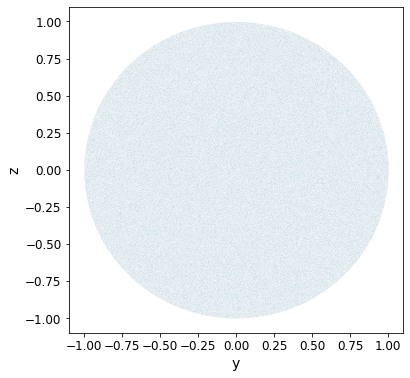

In [15]:
#Check the uniformity
plt.figure(figsize=(6,6))
plt.scatter(ys,zs,s=0.00001)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

$h(\mathcal{E},\mu,\sigma)$, on the other hand, is just a gaussian distribution, and can be sampled directly from NumPy functions.

In [16]:
Es     = np.random.normal(50, .5, size = num_samples)   #Consider a (50.0 +- .5)GeV beam
dist_s = 2 * me * Es #get distribution of s

## 4.2. Distribution $g(\theta^*,s)$

As the cross-section depends on $s$, the angular distribution of a non-monochromatic beam is non-trivial, as effectively every $\theta^*$ must be sampled from a different distribution.

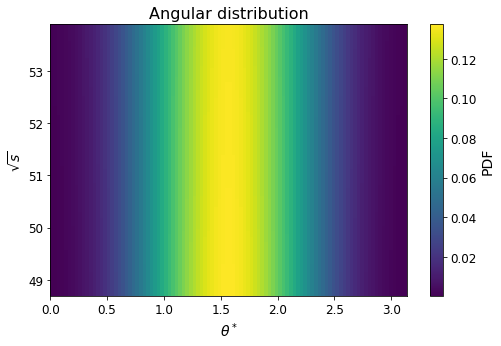

In [17]:
ths  = np.linspace(0,np.pi,1000)
sqs  = np.linspace(np.min(dist_s),np.max(dist_s),1000)
thsv, sqsv = np.meshgrid(ths,sqs)
thsv = thsv.reshape(-1,)
sqsv = sqsv.reshape(-1,)
gs   = g(sqsv**2,thsv)

fig, ax = plt.subplots(1, 1, figsize=(8,5))
*_, my_hist = ax.hist2d(thsv, sqsv, weights = gs, bins=100, density=True)
ax.set_xlabel("$\\theta^*$")
ax.set_ylabel("$\\sqrt{s}$")
ax.set_title("Angular distribution")
plt.colorbar(my_hist, ax = ax, label = "PDF") #See that maximum is fixed at theta = pi/2 for the entire range (or it is really close to it)
plt.show()

## 4.3. Monte Carlo simulation through rejection sampling method

So, differently from the mono-chromatic case, it is not easy to implement a inverse-transform method to sample $g(s,\theta^*)$. In the following, we then use rejection sampling, by generating (for every $s$) candidates $\theta^* \in (0, \pi)$, and accepting them with probability $g(s,\theta^*)$ (i.e., if another uniformly generated $z \in [0, \max g(s,\theta^*)]$ satisfies $z < g(s,\theta^*)$). We note that, at least in the energy range examined, $\max g(s,\theta^*) = g(s,\pi/2)$ (transverse production is favoured). 

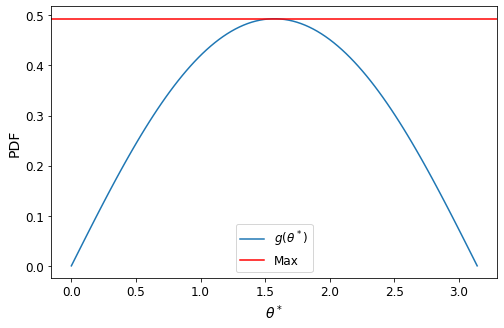

In [18]:
#Show that the maximum of g(s,theta^*) is g(s,pi/2)

fig, ax = plt.subplots(1, 1, figsize=(8,5))

thetas = np.linspace(0,np.pi,100)
ax.plot(thetas,g(220**2,thetas), label=r'$g(\theta^*)$')
ax.axhline(g(220**2, np.pi/2), color='red', label='Max')
ax.set_xlabel(r'$\theta^*$')
ax.set_ylabel(r'PDF')
ax.legend()

plt.show()

In [19]:
def generate_nonmonochromatic(s, batch_size=10000):
    """Generates N = len(s) events for a non-monochromatic beam with s near the threshold.
    Uses rejection method for sampling theta*.
    
    Parameters
    ----------
    s : ndarray (N,)
       Center of mass energies squared for each event [MeV^2]
    batch_size : int, optional
       Internal batch size used to improve performance
    
    Returns
    -------
    statistics : ndarray of size (N, 6)
       Each row is one event, and contains the components of the 3-momenta (in the laboratory frame)
       of the muon-antimuon pair, in [MeV/c]
    """
    
    assert np.all(s > 4 * mmu**2), "Some energies are under the threshold for muon production"
    
    N = len(s)
    ths = np.zeros(N)                            #theta*
    phs = np.random.uniform(0, 2*np.pi, size=N)  #phi*
    
    #generate theta* according to g(s, theta*)
    generated = 0
    g_max = np.max(g(s, np.pi/2)) #for s sufficiently small, the maximum of g is at theta* = pi/2
    
    buffer_s = np.copy(s[:batch_size])
    if (len(buffer_s) < batch_size):
        buffer_s = np.pad(buffer_s, (0, batch_size - len(buffer_s)), 'constant', constant_values=np.nan)
    
    while generated < N:
        u  = np.random.uniform(0, np.pi, size=batch_size)
        gu = g(buffer_s, u)
        v  = np.random.uniform(0, g_max, size=batch_size)
        
        selected = v <= gu
        n_selected = np.sum(selected)
        
        ths[generated:min(generated+n_selected, N+1)] = u[selected][:min(n_selected, N-generated)]
        
        #replaces already used values of s with new ones
        new_buffer = s[batch_size+generated:min(batch_size+generated+n_selected,N)]
        
        buffer_s[selected] = np.pad(new_buffer, (0, n_selected-len(new_buffer)), 'constant', constant_values=np.nan)
        
        generated += n_selected
    #Boost to laboratory frame
    pnorm = p_mu_cm(s)
    px_cm, py_cm, pz_cm = to_cartesian(pnorm, ths, phs)
    
    _, px1 = energy_x_boost(s, px_cm)  #px for first muon
    _, px2 = energy_x_boost(s, -px_cm) #px for second muon
    
    return np.stack((px1, py_cm, pz_cm, px2, -py_cm, -pz_cm), axis=1)

**Some implementation details**

As before, rejection sampling is implemented in batches, in order to use as much as possible fast NumPy u-funcs, and as little as possible the slow (and non-parallelizable) Python loops. In this case, however, a parameter $s$ varies for each sample, and exactly one $\theta^*$ must be sampled for every value of $s$.

So, for each batch:

1. (Basic rejection sampling) We generate $n$ candidates for the $\theta^*$, i.e. random numbers in $[0,\pi]$, where $n$ is the batch size.
   Then we evaluate $g(s,\theta^*)$ over all of these $\theta^*$, using as $\mathbf{s}$ the values stored in a buffer, which is initialized with the first $n$ values of the argument $\mathbf{s}$. Each candidate is accepted if another random variable $v$, picked uniformly in $[0, \max g]$ is lower than $g(s,\theta^*)$. This comparison is also vectorized.
2. Now, statistically, there will be some rejected samples, meaning that some items of $\mathbf{s}$ need to be reused in the next batch. So, all values of $s_i$ that have already resulted in accepted samples are replaced with new ones. If there aren't enough new $s_i$ to fill the "gaps" in the buffer, we use `np.nan` instead. In fact, according to the floating point specification, any computation (such as sums, multiplications, etc.) done with NaN will return NaN. So $g({\rm NaN},\theta^*)$ will be always NaN, and every comparison (for example the <= we use) will return False, meaning that introducing NaNs can't produce new selected $\theta^*$.
3. After having "refilled" the $s$ buffer, we can reiterate the cycle. Note that at every operation an entire batch is processed at once. Only at the execution's end there is some loss of perfomance due to the presence of missing values (NaNs).



In [20]:
#Generate 10^5 samples for the non-monochromatic beam
num_samples = int(1e5)

#Let's fix the center sqrt(s) at 230MeV. The E+ has a width of 0.5 GeV, that corresponds to a width of s equal to:
sigma_mu = 0.5 * 1e3 #0.5 GeV 
sigma_s  = 2 * me * (sigma_mu + me) 

#since the width is very large we need to check for values under the threshold 
s_vec   = np.array([x for x in np.random.normal(213**2, sigma_s, size=num_samples*2) if x > 4*mmu**2])[0:num_samples]

momenta = generate_nonmonochromatic(s_vec)

<ipython-input-19-a114401b2132>:38: RuntimeWarning: invalid value encountered in less_equal
  selected = v <= gu


In the non-monochromatic case, as the cross-section does not vary significantly in the examined energy range, the momenta distributions (in the laboratory frame) appear very similar to that of the monochromatic beam. One difference of interest is given by the more gradual fall-off at the edges: this is because the final distribution is a weighted average of many monochromatic distributions of different ranges.

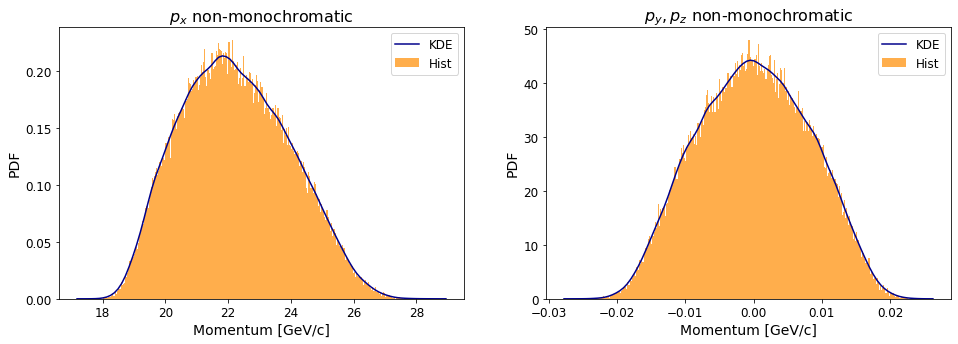

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

sns.distplot(momenta[:,0] / 1000,  ax = ax1, bins = int(np.sqrt(num_samples)), 
                    kde_kws  = {'color': 'darkblue',   'label': 'KDE'},
                    hist_kws = {'color': 'darkorange', 'alpha': 0.7, 'linewidth': 1, 'histtype':'barstacked', 'label': 'Hist'})
ax1.set_title(r'$p_x$ non-monochromatic')
ax1.set_xlabel(r'Momentum [GeV/c]')
ax1.set_ylabel(r'PDF')

sns.distplot(momenta[:,1] / 1000, ax = ax2, bins = int(np.sqrt(num_samples)), 
                    kde_kws  = {'color': 'darkblue',   'label': 'KDE'},
                    hist_kws = {'color': 'darkorange', 'alpha': 0.7, 'linewidth': 1, 'histtype':'barstacked', 'label': 'Hist'})

ax2.set_title(r'$p_y, p_z$ non-monochromatic')
ax2.set_xlabel(r'Momentum [GeV/c]')
ax2.set_ylabel(r'PDF')

plt.show()

# 5. Tracking detector statistics <a class="anchor" id="Report.5"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>

Let's compute the variation in the the trajectory induced by the presence of a magnet, each particle is identified by it's position at the end of the berillium block and it's tri-momentum at the exit.

Consider a particle with initial position $\mathbf{x}_0 = (x_0, y_0, z_0)^T$ and velocity $\mathbf{v}_0 = (v_{0x}, v_{0y}, v_{0z})^T$ in the laboratory frame, moving inside a magnetic field $\mathbf{B} = (0,0,B)^T$. The solution of the equation of motion is given by:
$$ 
    \begin{cases}
    x(t)= x_0 + \frac{v_{0y}}{\omega} + \dfrac{v_{\perp}}{\omega}\sin (\omega t -\alpha)\\
    y(t)= y_0 - \frac{v_{0x}}{\omega} + \dfrac{v_{\perp}}{\omega}\cos (\omega t -\alpha)\\
    z(t)= z_0 + v_{0z}t
    \end{cases} 
    \qquad 
    \begin{cases}
    p_x(t)= p_\perp \cos (\omega t -\alpha)\\
    p_y(t)= -p_\perp \sin (\omega t -\alpha)\\
    p_z(t)= p_{z0}
    \end{cases} 
$$
With:
$$
\omega =\frac{qB}{m\gamma}; \qquad \alpha=\arctan\left(\frac{v_{0y}}{v_{0x}}\right)=\arctan \left(\frac{p_{0y}}{p_{0x}}\right); \quad v_\perp=\sqrt{v_{0x}^2+v_{0y}^2}; \quad p_\perp = \sqrt{p_{0x}^2 + p_{0y}^2}
$$
As the relation between momentum and velocity is given by:
$$
\mathbf{p}c = m \gamma \mathbf{v}
$$
we have:
$$
 \frac{v_\perp}{\omega}=\frac{c\sqrt{p_{0x}^2+p_{0y}^2}}{qB}
$$
The particle exits the magnetic field after travelling a fixed distance $x(\hat{t})$ over the $\hat{x}$ axis, leading to:
$$
\omega \hat{t}=\alpha + \arcsin \left(\left[x(\hat{t}) - x_0 - \frac{v_{0y}}{\omega} \right] \frac{\omega}{v_\perp} \right)
$$
After the magnet the EOM is the one of a free particle.

In [22]:
#let's put the values
import scipy as sp
import math
import numpy as np

q   = 1.602176634e-19 #Elementary charge [C]
B   = 1.7 #Magnetic field intensity [B]
c   = 3e8 #Speed of light [m/s]
mmu = 105.6583755 #Muon mass [MeV/c]

qB  = q*B 

In [23]:
#Fixed the c
def bend_particle (positions, momenta, meters): 
    """Computes the final position and momentum of N particles starting at @position, with @momentum, subject to a constant magnetic field
    along z, and stopping after @meters in the x direction.
       
    Parameters
    ----------
    positions : ndarray, (N, 3)
       Starting coordinates for the particle [m]
    momenta : ndarray, (N, 3,)
       Starting momentum for the particle [MeV/c]
    meters : float
       The particle stops after travelling @meters in the x direction
    
    Returns
    -------
    final_pos, final_p : Tuples of ndarray, each of dimension (N, 3)
       final_pos = Final coordinates for the particles [m]
       final_p   = Final particles momentum [Mev/c]
    """
    
    assert len(positions) == len(momenta), "Positions and momenta must be of the same length"
    assert len(positions.shape) == len(momenta.shape) == 2, "Positions and momenta must be matrices"
    
    p_norm_sq = np.sum(np.square(momenta), axis=1) #|p|^2 in [Mev^2/c^2]
    
    cc = 2.99792458e2 #to reduce numerical errors (=c/1e6)
    
    gamma = np.sqrt(p_norm_sq / (mmu**2) + 1)
    omega = (B * c) / (mmu * cc * gamma)
    
    alpha = np.arctan(momenta[:,1] / momenta[:,0]) 
    
    
    p_pe  = np.sqrt(np.sum(np.square(momenta[:,:2]), axis=1))
    v_w   = p_pe / (B * cc) #rapporto v perperdicolare su omega, il 10^6 è perche il momento è in Mev
    #EDIT: v_w = |vpe|/w deve essere in [m] La radice dei momenti è in MeV/c, per cui non serve dividere per q (dato che siamo in eV), e bisogna aggiungere una c al denominatore  
    #Full conto: MeV/c / (C * T) = e/c * 1e6 [m], dove e è la carica dell'elettrone, e c la velocità della luce. 
    
    wt = alpha + np.arcsin((meters - positions[:,0] - momenta[:,1] / (B * cc)) / v_w) #omega per tempo (EDITED)
    
    final_position = np.stack(( v_w * np.sin(wt - alpha) + momenta[:,1] / (B * cc),
                                v_w * np.cos(wt - alpha) - momenta[:,0] / (B * cc), 
                                momenta[:,2] * wt / (B * cc)
                               ), axis=1)    
    final_position += positions #sum initial position
    
    final_momentum = np.stack((p_pe * np.cos(wt - alpha), -p_pe * np.sin(wt - alpha), momenta[:,2]), axis=1)
    
    return final_position, final_momentum


def free_particle(positions, momenta, meters):
    """Computes the final positions of N particles, given their initial @positions and @momenta, after having travelled @meters
    in the x direction (uniform motion)
    
    Parameters
    ----------
    positions : ndarray of size (N,3)
       Particles initial positions [m]
    momenta : ndarray of size (N,3)
       Particles initial momenta [MeV/c]
    meters : 
       Motion stops after having travelled this distance [m] over the x axis
    
    Returns
    -------
    final_position : ndarray of size (N,3)
       Final positions for the particles [m]
    """
    
    p_norm_sq = np.sum(np.square(momenta), axis=1) #|p|^2 in [Mev^2/c^2]
    gamma = np.sqrt(p_norm_sq + mmu**2) / mmu
    
    velox = momenta * c / (mmu * gamma[..., np.newaxis])
    arrival_times = meters / velox[:,0] #time travel on the x axis
    
    final_position = np.stack(( np.full(len(positions), fill_value = meters),
                                velox[:, 1] * arrival_times,
                                velox[:, 2] * arrival_times
                              ), axis=1)
    final_position += positions
    
    return final_position

**Simulation**

Now using the previous defined Monte Carlo generator of events we can observe the evolution of a non-monochromatic beam in a magnet and after a certain space of free propagation, we will at first generate the events then plot the beam density after the magnet (2 meters long) and after 6 meters of free propagation:

511.52224200000006


<ipython-input-19-a114401b2132>:38: RuntimeWarning: invalid value encountered in less_equal
  selected = v <= gu


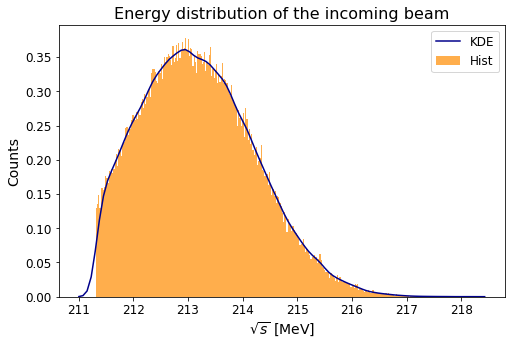

In [24]:
#Magnet deflection
num_samples = int(1e5)

#since i wanto 1e5 events but some of them may be under the threshold of the u-u+ 
# production i need to generate more (the double just to be sure)
#and select the first 1e5 throught a mask
s_vec   = np.array([x for x in np.random.normal(213**2, sigma_s, size=num_samples*2) if x > 4*mmu**2])[0:num_samples]
momenta = generate_nonmonochromatic(s_vec) #Generate non-monochromatic events

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.distplot(np.sqrt(s_vec), ax = ax, bins = int(np.sqrt(num_samples)), 
                    kde_kws  = {'color': 'darkblue',   'label': 'KDE'},
                    hist_kws = {'color': 'darkorange', 'alpha': 0.7, 'linewidth': 1, 'histtype':'barstacked', 'label': 'Hist'})

ax.set_xlabel("$\sqrt{s}$ [MeV]")
ax.set_ylabel("Counts")
ax.set_title("Energy distribution of the incoming beam")
plt.show()

We generated the energies and momenta now we want the scattering position, theoretically we should consider the fact that each particle has a certain probability of scattering in each point of the target but given the maximum scattering angle value, that is:
$$
\theta_{MAX}^{\mu}=\frac{4m_e}{s}\sqrt{\frac{s}{4}-m_\mu}
$$


In [25]:
th_max = 4 * me * np.sqrt(s/4 - mmu) / s
print("Maximum angle at ", 216, "MeV: ", th_max, "rad")
print("Maximum deviation: ", 6*math.sin(th_max), "cm")

Maximum angle at  216 MeV:  0.004425692545037327 rad
Maximum deviation:  0.026554068585355473 cm


We have a very small correction considered the beam dimension considered a scatter at maximum angle at the start of the target; now we can generate the positions all on the same x value and see how the beam evolves.

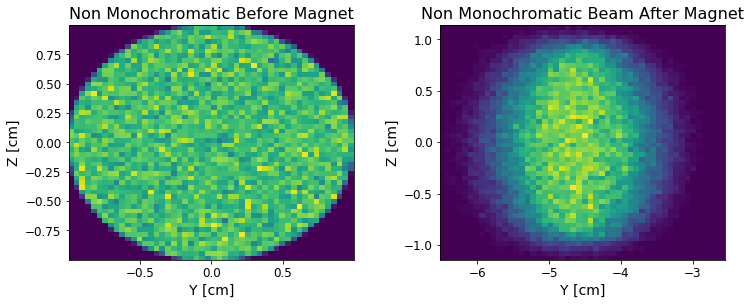

In [26]:
y, z = generate_yz(num_samples, 1) 
#Not all particles scatter at the same position in the target. However, as the beryllium block is only 6cm thick, and thetamax
#in the scattering is <.01 rad, the additional transversal deviation gained is negligible (a few micron, compared to a beam width
#of 2cm)
x = np.zeros(num_samples) #All particles enter B at the same position along x. (0,0,0) is the center of the beam at the target exit.
#x is the longitudinal beam direction, while y and z are the trasversal ones

positions = np.stack((x, y, z), axis=1) / 100 #[cm]

#let's see the effect of the magnet
f_pos, f_mom = bend_particle(positions, momenta, 2)

#and plot before and after
fig, (before, after) = plt.subplots(1, 2, figsize=(11,5))
fig.tight_layout(pad=5.0)
before.hist2d(positions[:,1]*100, positions[:,2]*100, bins=50)
before.set_title("Non Monochromatic Before Magnet")
before.set_xlabel("Y [cm]")
before.set_ylabel("Z [cm]")
after.hist2d(f_pos[:,1]*100, f_pos[:,2]*100, bins=50)
after.set_title("Non Monochromatic Beam After Magnet")
after.set_xlabel("Y [cm]")
after.set_ylabel("Z [cm]")

plt.show()

Text(0, 0.5, 'Z [cm]')

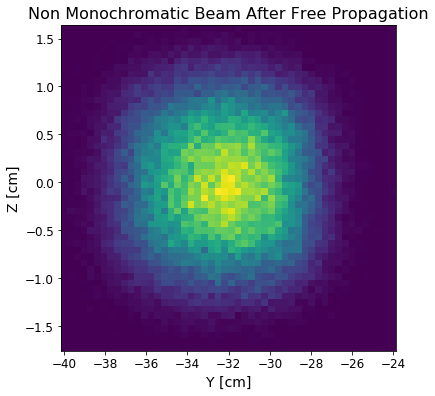

In [27]:
#Linear propagation after the magnet
ff_pos = free_particle(f_pos, f_mom, 6)

#and plot
fig, fig1=plt.subplots(1, 1, figsize=(6,6))
fig1.hist2d(ff_pos[:,1] * 100, ff_pos[:,2] * 100, bins=50)
fig1.set_title("Non Monochromatic Beam After Free Propagation")
fig1.set_xlabel("Y [cm]")
fig1.set_ylabel("Z [cm]")

It's clearly visible how the beam is still concentrated in an almost well defined region in the space but is a little spread along the Y direction, just to see how it's energy is involved let's compare it with  a monochromatic beam:

<ipython-input-19-a114401b2132>:38: RuntimeWarning: invalid value encountered in less_equal
  selected = v <= gu


Text(403.7999999999999, 0.5, 'Z [cm]')

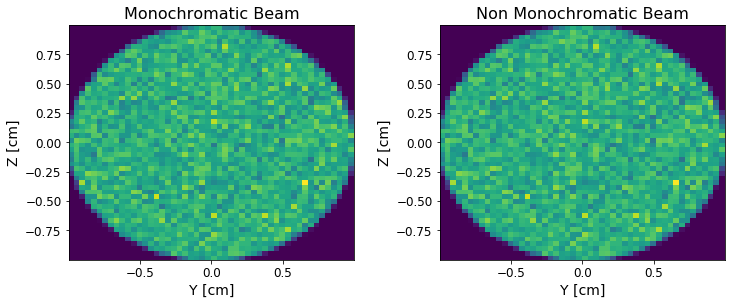

In [28]:
#non monochromatic beam
NonMono_s = np.array([x for x in np.random.normal(213**2, sigma_s, size=num_samples*2) if x > 4*mmu**2])[0:num_samples] #Generate energies
NonMono_momenta = generate_nonmonochromatic(NonMono_s) #Generate non-monochromatic events

#monochromatic beam
Mono_momenta= generate_monochromatic(213, num_samples)

#we can use the same starting position for the 2 beams and see how they evolve
x = np.zeros(num_samples) 
y, z = generate_yz(num_samples, 1) 
positions = np.stack((x, y, z), axis=1) /100 # [cm]

#let's make a plot of the starting position
fig, (mFig, nmFig) = plt.subplots(1, 2, figsize=(11,5))
fig.tight_layout(pad=5.0)
mFig.hist2d(positions[:,1]*100, positions[:,2]*100, bins=50)
mFig.set_title("Monochromatic Beam")
mFig.set_xlabel("Y [cm]")
mFig.set_ylabel("Z [cm]")
nmFig.hist2d(positions[:,1]*100, positions[:,2]*100, bins=50)
nmFig.set_title("Non Monochromatic Beam")
nmFig.set_xlabel("Y [cm]")
nmFig.set_ylabel("Z [cm]")

Text(403.7999999999999, 0.5, 'Z [cm]')

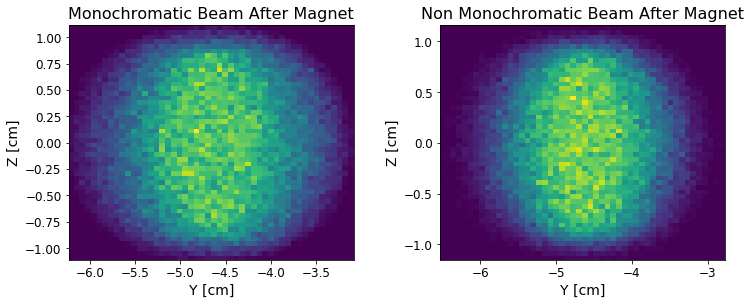

In [29]:
#let's make them evolve 2 meters inside the magnet and see how they look 
NonMono_BendedPos, NonMono_BendedMom = bend_particle(positions, NonMono_momenta, 2)
Mono_BendedPos, Mono_BendedMom = bend_particle(positions, Mono_momenta, 2)

#plot after magnet
fig2, (mFig2, nmFig2) = plt.subplots(1, 2, figsize=(11,5))
fig2.tight_layout(pad=5.0)
mFig2.hist2d(Mono_BendedPos[:,1]*100, Mono_BendedPos[:,2]*100, bins=50)
mFig2.set_title("Monochromatic Beam After Magnet")
mFig2.set_xlabel("Y [cm]") 
mFig2.set_ylabel("Z [cm]")
nmFig2.hist2d(NonMono_BendedPos[:,1]*100, NonMono_BendedPos[:,2]*100, bins=50)
nmFig2.set_title("Non Monochromatic Beam After Magnet")
nmFig2.set_xlabel("Y [cm]")
nmFig2.set_ylabel("Z [cm]")

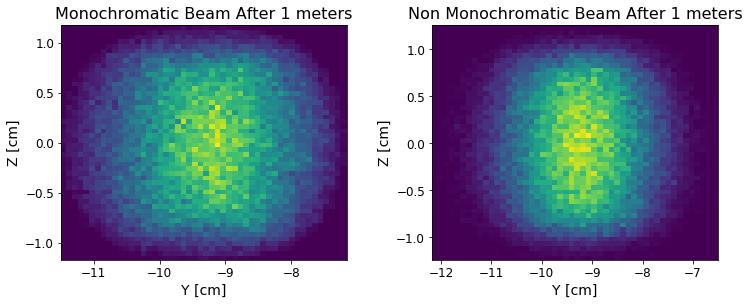

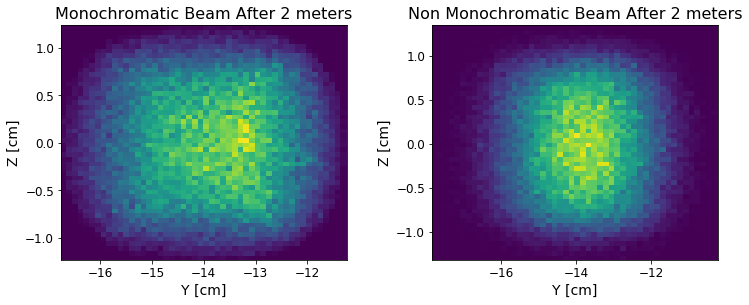

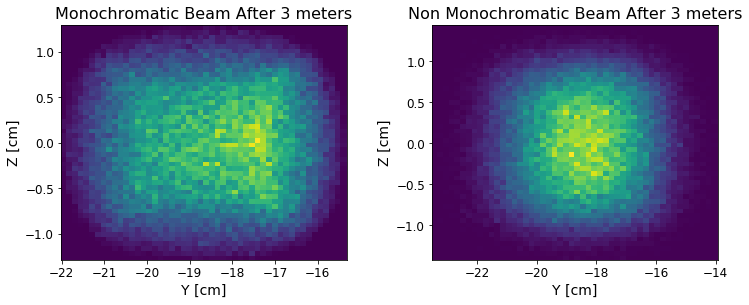

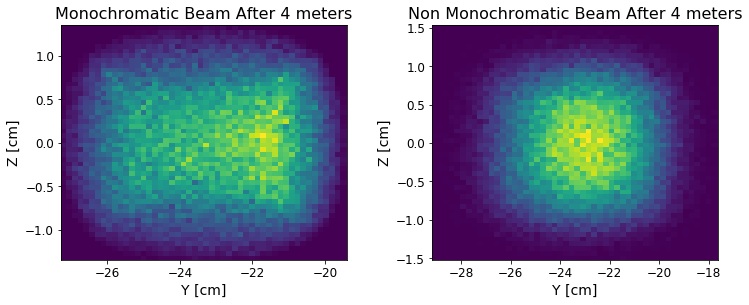

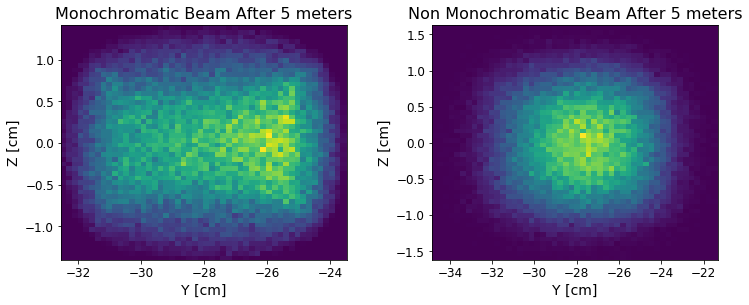

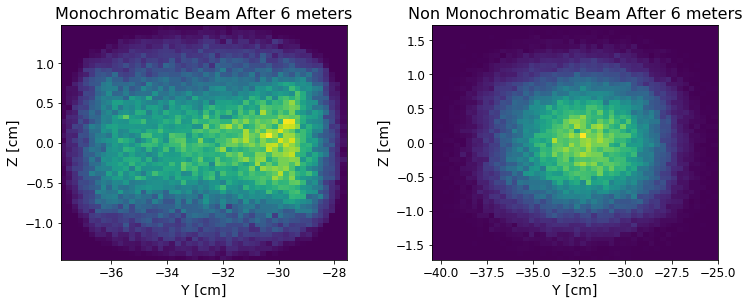

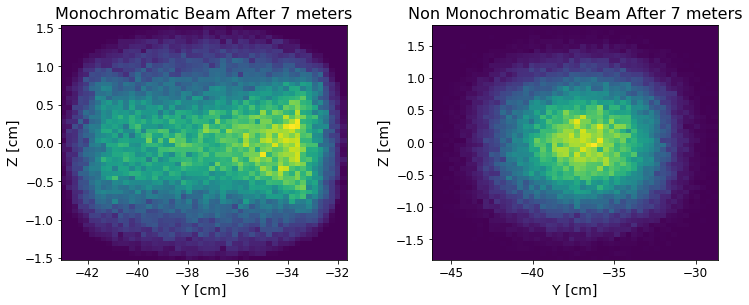

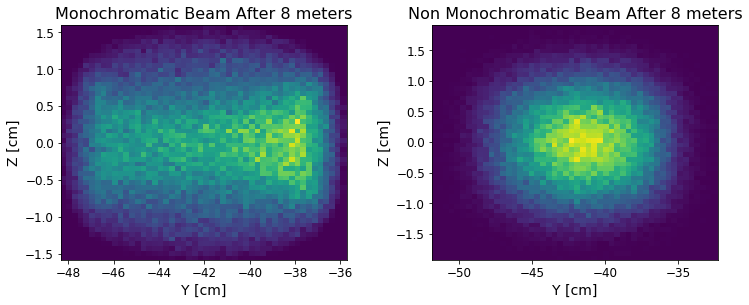

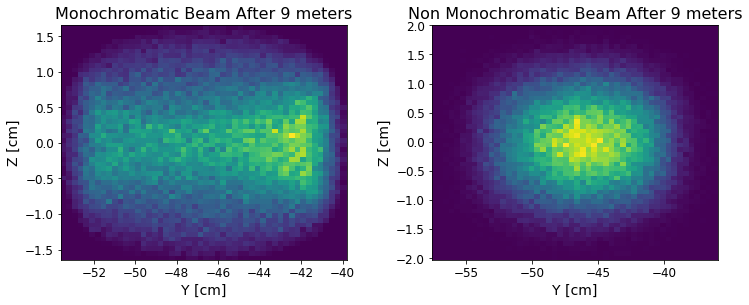

In [30]:
#now let's see how they evolve freely
for i in range (1,10):
    Mono_FreePos= free_particle(Mono_BendedPos, Mono_BendedMom, i)
    NonMono_FreePos= free_particle(NonMono_BendedPos, NonMono_BendedMom, i)
    
    fig2, (mFig2, nmFig2) = plt.subplots(1, 2, figsize=(11,5))
    fig2.tight_layout(pad=5.0)
    mFig2.hist2d(Mono_FreePos[:,1]*100, Mono_FreePos[:,2]*100, bins=50)
    mFig2.set_title("Monochromatic Beam After "+str(i)+" meters")
    mFig2.set_xlabel("Y [cm]")
    mFig2.set_ylabel("Z [cm]")
    nmFig2.hist2d(NonMono_FreePos[:,1]*100, NonMono_FreePos[:,2]*100, bins=50)
    nmFig2.set_title("Non Monochromatic Beam After "+str(i)+" meters")
    nmFig2.set_xlabel("Y [cm]")
    nmFig2.set_ylabel("Z [cm]")

# 6. Comparison with Babayaga simulator results <a class="anchor" id="Report.6"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>

The results of our simulations have been compared to the ones coming from babayaga_NLO [2]. The executable file was run with the following parameters value:

* N of events: $10^7$
* Final state: $\mu^-\mu^+$
* CoM energy: $0.230 \ \mathrm{GeV}$
* Acollinearity: $10°$

It is important to observe that Babayaga results are given in CoM frame.

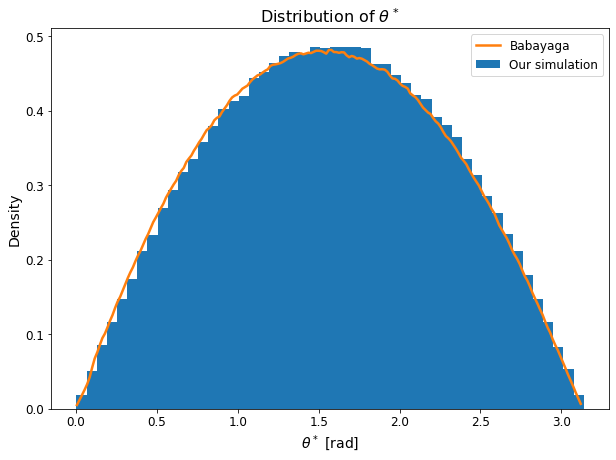

In [31]:
babayaga_el_th = np.radians(np.loadtxt("./babagaya_run/matched_el_th_exp_200.txt").T)
theta_samples= np.loadtxt("./thetas_dist.txt")

plt.figure(figsize=(10,7))
N_th, bins_th, _ = plt.hist(theta_samples, bins=50, density=True, label='Our simulation')
normalization    = np.max(babayaga_el_th[1])/np.max(N_th)

x_babayaga  = (babayaga_el_th[0][1:] + babayaga_el_th[0][:-1]) / 2
y_babayaga  = (babayaga_el_th[1][1:] + babayaga_el_th[1][:-1]) / 2 

plt.plot(x_babayaga, y_babayaga/normalization, linewidth=2.5, label="Babayaga")
plt.xlabel(r'$\theta^*$ [rad]')
plt.ylabel(r'Density')
plt.title(r'Distribution of $\theta^*$')
plt.legend()

plt.show()

# Citations
- [1]: Electron-positron annihilation into muon-antimuon pairs, full calculation, [link](http://www.physics.usu.edu/Wheeler/QFT/PicsII/QFT10Feb23Muon.pdf)
- [2]: [Babayaga](https://www2.pv.infn.it/~hepcomplex/babayaga.html) event generator.